# Introduction

Unsupervised models excel at identifying statistical outliers within a dataset. This works well as these models are sensitive to instances which deviate from the global norm. For anomaly detection this might not be enough. In domain-specific scenarios, anomalies within a dataset might be self-similar and could even exist within well-populated local neighborhoods. Consequently, an unsupervised model might overlook these instances in favor of those which stand-out. For example, a model might flag a single 100 million USD transaction if the dataset average is 25 million USD per transaction. Picking such an instance as an anomaly is easy but useless to a forensic accountant who might be more interested in a dozen 5 million USD transactions done by six different accounts within minutes of each other.

Due to the inflexibility of these models, semi-supervised models have become the norm in anomaly detection. Semi-supervised models combine the strengths of supervised and unsupervised learning. Supervised learning models tend to be highly accurate and effective due to the presence of labels during training. The performance of these models is also easier to measure as true labels can be compared to predicted labels. Unsupervised learning eliminates the need for labels while still producing robust models. This is great for anomaly detection as these models can identify inherent patterns within a dataset e.g., by creating clusters or by using tree-based tactics which can pick out anomalous instances. However, as noted before, these unsupervised models don't always do well when faced with domain-specific anomalies.

Semi-supervised models, unlike supervised models which demand an entire dataset be labelled, can improve performance even when trained on very few labels. Moreover, unlike unsupervised models whose predicted labels/clusters might not reflect the real-world, these models can identify domain-specific anomalies because they have labels to reference (regardless of how few these might). While labels might be expensive to acquire, the improved performance of these models on anomaly detection tasks has fueled their popularity.

This popularity is partly due to label propagation, a cornerstone semi-supervised algorithm, which has made it possible to train highly accurate models on sparsely-labelled datasets. Label propagation diffuses a few labels to all unlabeled instances within the dataset. This can be achieved due to the assumption that an instance label is also the label of the community/neighborhood that the instance belongs to. Therefore, if an instance is labeled as fraudulent its closest neighbors should also be fraudulent. In an iterative process, label propagation can start with a 5% labeled dataset and generate pseudo-labels fro the rest of the dataset.

While label propagation might be effective, its performance is dependent on the accuracy and timeliness of the existing labels. The temptation to use labeled legacy data is high especially for organizations that want to achieve quick results. However, this leads to models that are outdated on launch. This is where active learning comes in. Active learning queries users for instance labels on a regular basis. This ensures that the labels are timely and that the models can evolve even when the definition of what is anomalous within a domain changes.

In this paper we propose an approach, called Semi-supervised Active Learning Anomaly Detection (SSALAD), which implements a variety of querying techniques to acquire labels from users in order to build a robust anomaly detection model. By taking advantage of active learning, SSALAD ensures that the model will still perform well even when domain-specific anomalies evolve.

# Methodology - SSALAD

## Querying Techniques

There are four querying techniques which SSALAD implements: random, uncertainty, anomalous, and medoid querying. The use of the SSAD model gets to choose one of them during the model training process.

### Random querying

Random querying uses simple random sampling (SRS) to present users with instances to label. Its main advantage is that it's unbiased and any instance within the dataset can be presented for labeling. This means that the user will help the model in identifying both inliers and outliers within the dataset.

<div>
<img src="https://media.geeksforgeeks.org/wp-content/uploads/20231110115024/Simple-Random-Sampling.png" height="400"/>
</div>

### Uncertainty querying

This querying technique presents the most uncertain instances for the user to label. The uncertainty is based on the prediction confidence of the SSALAD model. The lower the confidence the more likely we will present the instance to the user for labelling.

<div>
<img src="https://analystprep.com/cfa-level-1-exam/wp-content/uploads/2019/10/page-159.jpg" height="400"/>
</div>

### Anomalous querying

The SSALAD model generates anomaly scores for each instance. The bigger the score the more anomalous the instance. In this case, we have a choice of presenting the user with the instances that have the highest or lowest anomaly scores.

<div>
<img src="https://dataheroes.ai/wp-content/uploads/2023/05/post-2457-1.png"/>
</div>

### Medoid querying

Medoid querying uses clustering to determine the medoid of each neighborhood/community. The medoid is the most representative instance within that community. Presenting the user with a medoid, allows us to get a label that accurately describes the entirety of its neighborhood.

<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/8/81/CarMedoidExample.png" height="300"/>
</div>

## Label Propagation

Querying labels for 100% of the instances within a dataset is quite expensive. This is why once a few labels have been queried we carry out label propagation. Using label propagation we diffuse the collected labels to the rest of the dataset. The result will be a dataset whose instances are identified to be either outliers or inliers.

<div>
<img src="https://dist.neo4j.com/wp-content/uploads/20190226091707/label-propagation-graph-algorithm-1.png"/>
</div>

## Model Training

A unique feature of SSALAD is how the model is trained. Instead of using the labelled dataset, created through label propagation, to train a supervised classified, we train the mode only on inliers. This is achieved by dropping all outlier instances from the labeled dataset. The resultant model will be quite sensitive to outliers and will generally outperform models which were trained with the full dataset.

## Continuous Active Learning

The model training described above greatly improves when coupled with active learning. When users are constantly queried for labels, the SSALAD model can pick up on changes in the distribution of the data. Therefore, if the inliers or outliers change neighborhoods, or if new neighborhoods are created, the model will still be able to detect anomalous instances.

<div>
<img src="https://www.cloudfactory.com/hs-fs/hubfs/04-blog-img/Scalable-Active-Learning-for-Autonomous-Driving.png?width=2130&name=Scalable-Active-Learning-for-Autonomous-Driving.png" height="400"/>
</div>

# Experiment Results

After the experiments have been run we end up with results that look like this:

In [41]:
import pandas as pd
from utils.result_plotter import plot_ssalad_results

In [43]:
results = pd.read_csv('first_run_csv')
results.head()

,dataset,num_samples,model,fraction,rep,query_strategy,propagation,roc_auc
0,1_ALOI,500,KNN,0.0,0,random,True,0.473814
1,1_ALOI,500,KNN,0.0,1,random,True,0.593127
2,1_ALOI,500,KNN,0.0,2,random,True,0.448660
3,1_ALOI,500,KNN,0.0,3,random,True,0.415533
4,1_ALOI,500,KNN,0.0,4,random,True,0.542405


With these results we can answer important questions about the performance of semi-supervised models and moreover, we can determine how much the performance improves if you were to select a specific querying strategy.

In [46]:
datasets = ['1_ALOI',
 '2_annthyroid',
 '3_backdoor',
 '4_breastw',
 '5_campaign',
 '6_cardio',
 '7_Cardiotocography',
 '8_celeba',
 '9_census',
 '10_cover',
 '12_fault',
 '11_donors',
 '14_glass',
 '13_fraud',
 '15_Hepatitis',
 '16_http',
 '17_InternetAds',
 '18_Ionosphere',
 '19_landsat',
 '20_letter',
 '21_Lymphography',
 '22_magic.gamma',
 '23_mammography',
 '24_mnist',
 '25_musk',
 '26_optdigits',
 '27_PageBlocks',
 '28_pendigits',
 '29_Pima',
 '30_satellite',
 '31_satimage-2',
 '32_shuttle',
 '33_skin',
 '34_smtp',
 '35_SpamBase',
 '36_speech',
 '37_Stamps',
 '38_thyroid',
 '39_vertebral',
 '40_vowels',
 '41_Waveform',
 '42_WBC',
 '43_WDBC',
 '44_Wilt',
 '45_wine',
 '46_WPBC',
 '47_yeast']

KeyError: 'kernel'

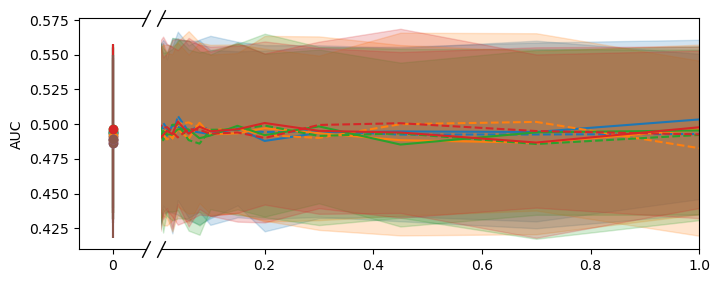

In [48]:
import warnings
warnings.filterwarnings('ignore')
for dataset in datasets:
  plot_ssalad_results(results,dataset,"IForest")

#References